In [2]:
%matplotlib inline

import numpy as np
import networkx as nx
import matplotlib
import re
import os
import sys
import time
import itertools
import seaborn
import matplotlib.pyplot as plt


import matplotlib.cm as cm
from matplotlib.colors import Normalize



from scipy.spatial.distance import pdist
clrs = seaborn.color_palette("RdBu_r",n_colors=9)
seaborn.set(style='ticks',font_scale=2)

sys.path.append("/Users/Yves/Documents/Code/structural_knowledge/packages/")
sys.path.append(r'C:\Users\takam\Documents\Code\line_loop\packages')

import mouse_poker.optimize_task as mpko

# List of directed graphs with degree 2 and 9 vertices 

In [3]:
poke_pos = mpko.layout.poke_pos

In [4]:
edges = [[i-1,i] for i in range(1,9)]
edges.extend([[i+1,i] for i in range(0,8)])
edges.extend([[0,8],[8,0]])

In [5]:
rew_nodes = [1,3,5,7]

In [6]:
layouts = mpko.layout.get_all_valid_physical_layouts(rew_nodes,9)

In [7]:
edge_set = mpko.layout.get_transition_set(edges)

In [8]:
all_angle,all_dists = mpko.layout.get_all_edge_angles_and_dists(edge_set,layouts)

In [9]:
#These are the measures we think we are interested in

mu_angle = [np.min(i) for i in all_angle]
var_angle = [np.var(i) for i in all_angle]
var_dist =   [np.max(np.var(i,axis=0)) for i in all_dists]

costs = np.vstack([-np.array(mu_angle),var_angle,var_dist])  #costs so trying to minimise

In [10]:
plot_ixs = reversed(np.argsort(mu_angle)[-6*24:][::6])

In [11]:
[7,5,2,3,6,8,1,0,5]

[7, 5, 2, 3, 6, 8, 1, 0, 5]

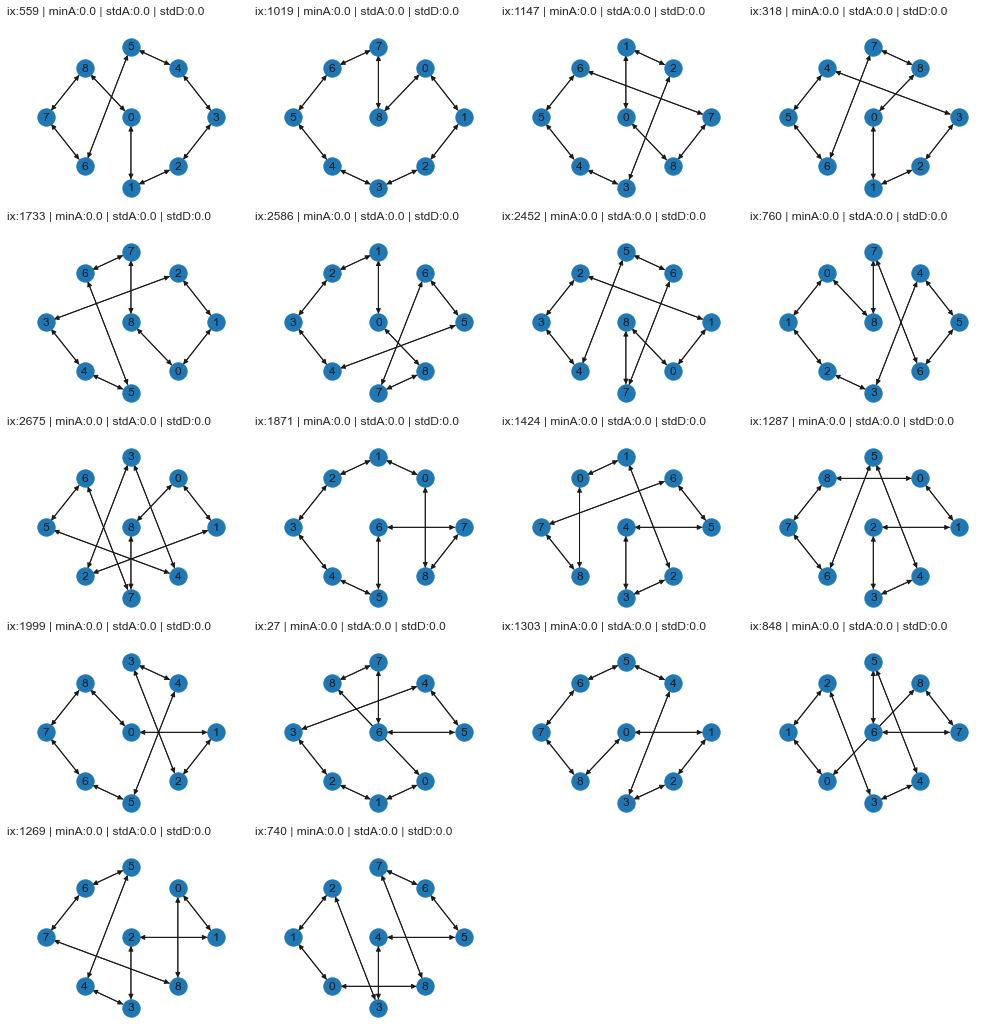

In [12]:
mpko.layout.plot_bunch_o_graphs(plot_ixs,layouts,edges)

In [13]:
goodIxs,badIxs,mus = mpko.layout.select_graphs_by_percentile(costs,percentile=70)

In [14]:
pareto_ixs = np.where(mpko.layout.is_pareto_efficient_simple(-costs.T))[0]

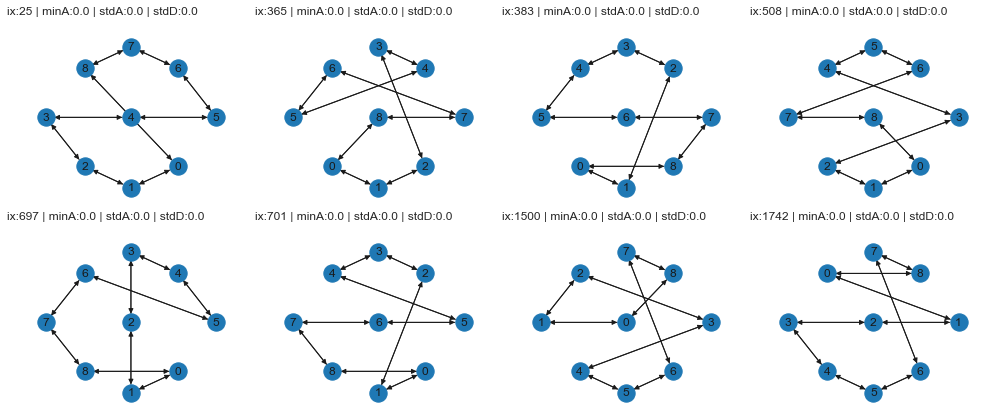

In [15]:
mpko.layout.plot_bunch_o_graphs(pareto_ixs,layouts,edges)

In [16]:
[6,8,1,3,7,0,4,5,2]

[6, 8, 1, 3, 7, 0, 4, 5, 2]

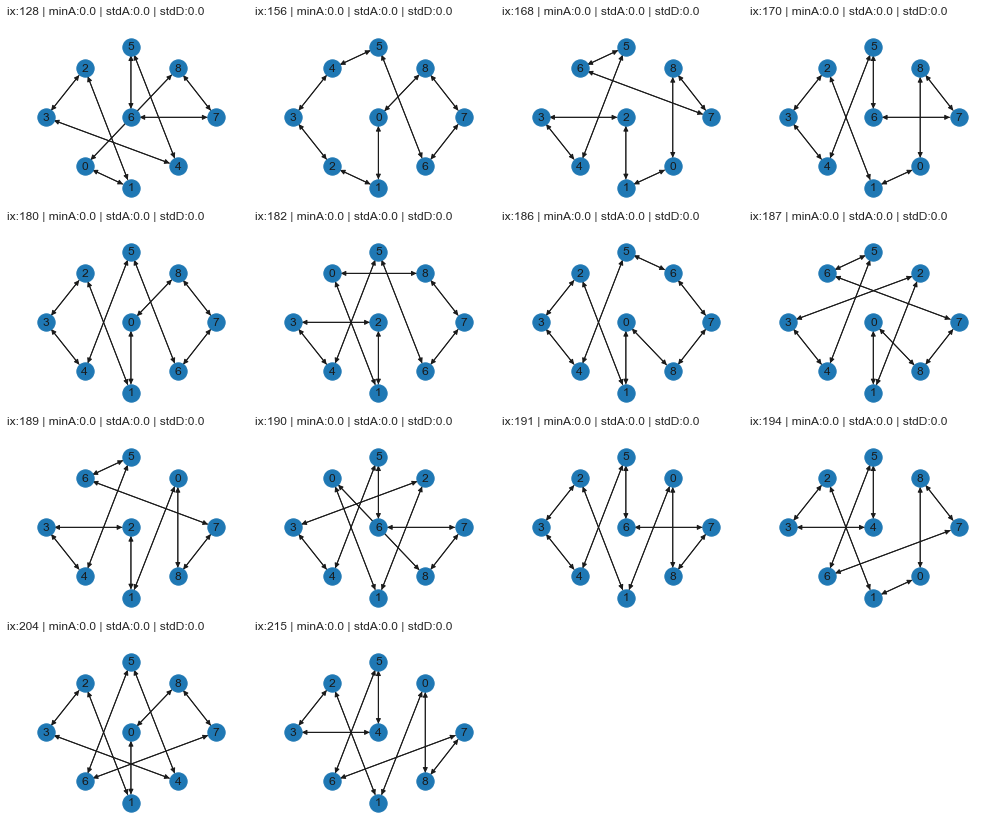

In [17]:
mpko.layout.plot_bunch_o_graphs(goodIxs,layouts,edges)

In [18]:
[]

[]

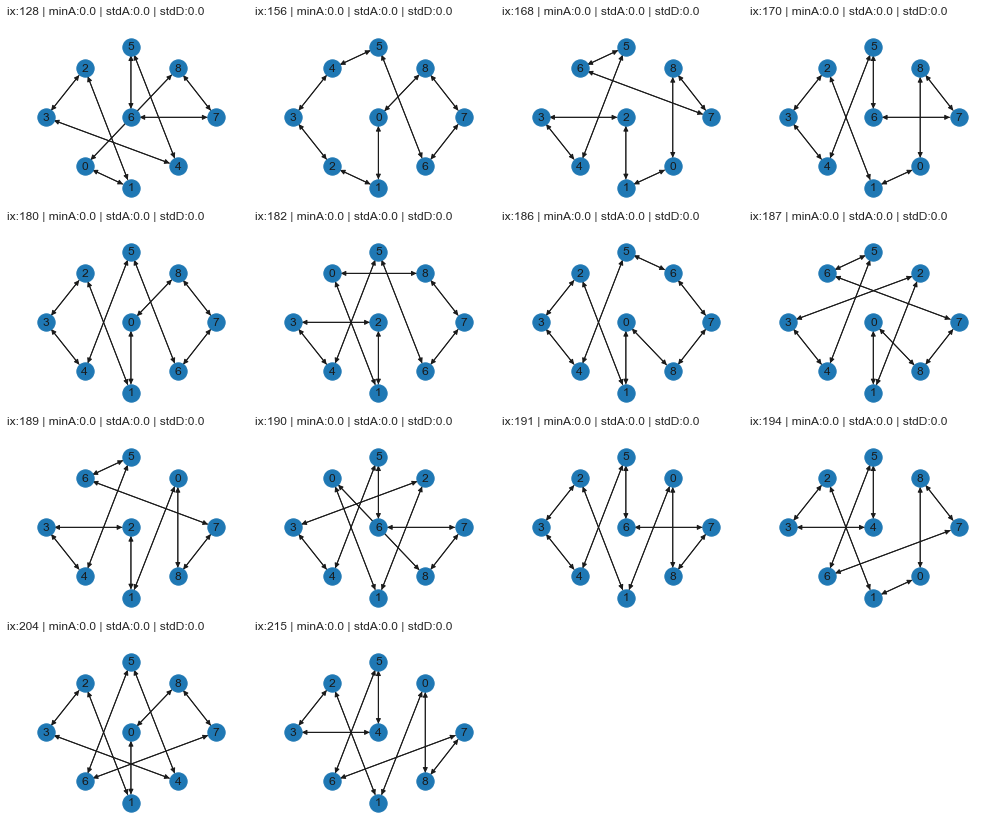

In [19]:
mpko.layout.plot_bunch_o_graphs(goodIxs,layouts,edges)

In [20]:
191,215,194,170

(191, 215, 194, 170)

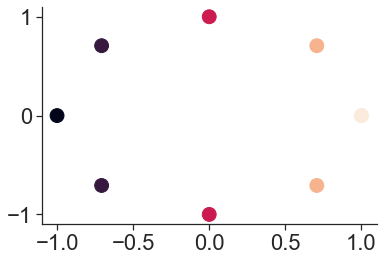

In [21]:
xpos = np.cos(np.linspace(0,2*np.pi,9))
ypos = np.sin(np.linspace(0,2*np.pi,9))
plt.scatter(xpos,ypos,s=192,c=xpos)
seaborn.despine()

In [23]:
all_nice = [191,215,194,170]# + [158,565,734,1037,740,1036,125]
uniq_set,all_uniq = mpko.layout.check_set_of_graphs_uniq(all_nice,layouts)

In [24]:
mpko.layout.flip([2,8,1,3,4,0,6,5,7])

[7, 0, 6, 3, 4, 8, 1, 5, 2]

In [27]:
layouts[215]

array([7, 0, 6, 3, 4, 8, 1, 5, 2])

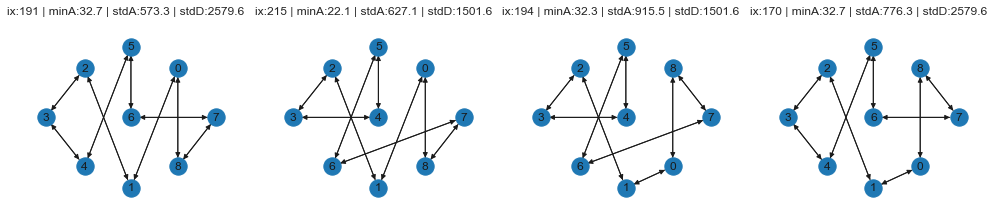

In [28]:
mpko.layout.plot_bunch_o_graphs(uniq_set,layouts,edges,mu_angle,var_angle,var_dist)

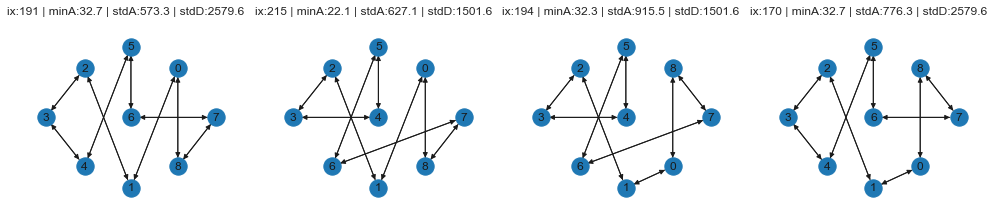

In [29]:
mpko.layout.plot_bunch_o_graphs(uniq_set,layouts,edges,mu_angle,var_angle,var_dist)

In [40]:
lyt = [7, 0, 6, 3, 1, 8, 4, 5, 2]

In [42]:
for i in range(len(lyt)):
    print(lyt[i:] + lyt[:i])

[7, 0, 6, 3, 1, 8, 4, 5, 2]
[0, 6, 3, 1, 8, 4, 5, 2, 7]
[6, 3, 1, 8, 4, 5, 2, 7, 0]
[3, 1, 8, 4, 5, 2, 7, 0, 6]
[1, 8, 4, 5, 2, 7, 0, 6, 3]
[8, 4, 5, 2, 7, 0, 6, 3, 1]
[4, 5, 2, 7, 0, 6, 3, 1, 8]
[5, 2, 7, 0, 6, 3, 1, 8, 4]
[2, 7, 0, 6, 3, 1, 8, 4, 5]


In [43]:
def check_set_of_graphs_uniq(initial_set):
    """ Check if a set of graphs is the same """
    final_set = []
    for g in initial_set:
        uniq = True
        for mvr in range(len(g)):
            gx = g[mvr:] + g[:mvr]
            for g2 in final_set:
                if mpko.layout.graph_same(gx,g2):
                    uniq = False
                    #break
        if uniq:
            final_set.append(g)
    return final_set, len(final_set)==len(initial_set)

In [50]:

unique_check = [[8,1,6,3,4,0,7,2,5],
                [8,4,2,5,7,0,6,1,3],
                [3,6,1,8,4,5,7,2,0],
                [0,2,4,3,6,8,7,1,5],
                [4,7,5,1,3,6,0,2,8],
                [1,8,2,3,6,0,4,5,7],
                [6,8,1,3,7,0,4,5,2],
                [7,5,2,3,6,8,1,0,4]]


#unique_check = [[8,1,6,3,4,0,7,2,5],
#               [1,6,3,4,0,7,2,5,8]]
unique_check2 = []
for i in unique_check:
    unique_check2.append(mpko.layout.flip(i))

In [169]:
unique_check3 = []
for j in unique_check2:
    tmp = []
    for i in j:
        tmp.append(j.index(i))
    unique_check3.append(tmp)

[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 6, 1, 3, 4, 8, 2, 7, 5]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[0, 4, 7, 5, 2, 8, 1, 6, 3]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[3, 1, 6, 0, 4, 5, 2, 7, 8]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2, 6, 5]
[8, 7, 4, 3, 1, 0, 2

In [51]:
#uniq_set,all_uniq = mpko.layout.check_set_of_graphs_uniq(fin_graphs,layouts)


In [52]:
check_set_of_graphs_uniq(unique_check2)

([[0, 6, 1, 3, 4, 8, 2, 7, 5],
  [0, 4, 7, 5, 2, 8, 1, 6, 3],
  [3, 1, 6, 0, 4, 5, 2, 7, 8],
  [8, 7, 4, 3, 1, 0, 2, 6, 5],
  [4, 2, 5, 6, 3, 1, 8, 7, 0],
  [6, 0, 7, 3, 1, 8, 4, 5, 2],
  [1, 0, 6, 3, 2, 8, 4, 5, 7],
  [2, 5, 7, 3, 1, 0, 6, 8, 4]],
 True)

In [123]:
layouts[158
       ]

array([6, 0, 1, 3, 4, 8, 2, 5, 7])

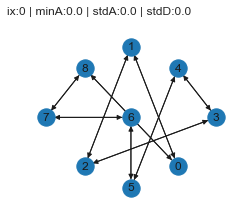

In [59]:
mpko.layout.plot_bunch_o_graphs([0],[mpko.layout.flip(mpko.layout.flip(unique_check2[5],'V'),'H')],edges)

In [ ]:
[[0, 6, 1, 3, 4, 8, 2, 7, 5],
 [0, 4, 7, 5, 2, 8, 1, 6, 3],
 [3, 1, 6, 0, 4, 5, 2, 7, 8],
 [8, 7, 4, 3, 1, 0, 2, 6, 5],
 [4, 2, 5, 6, 3, 1, 8, 7, 0],
 [6, 0, 7, 3, 1, 8, 4, 5, 2],
 [1, 0, 6, 3, 2, 8, 4, 5, 7],
 [2, 5, 7, 3, 1, 0, 6, 8, 4]]


In [170]:
unique_check

[[8, 1, 6, 3, 4, 0, 7, 2, 5],
 [8, 4, 2, 5, 7, 0, 6, 1, 3],
 [3, 6, 1, 8, 4, 5, 7, 2, 0],
 [0, 2, 4, 3, 6, 8, 7, 1, 5],
 [4, 7, 5, 1, 3, 6, 0, 2, 8],
 [1, 8, 2, 3, 6, 0, 4, 5, 7],
 [6, 8, 1, 3, 7, 0, 4, 5, 2],
 [7, 5, 2, 3, 6, 8, 1, 0, 4]]

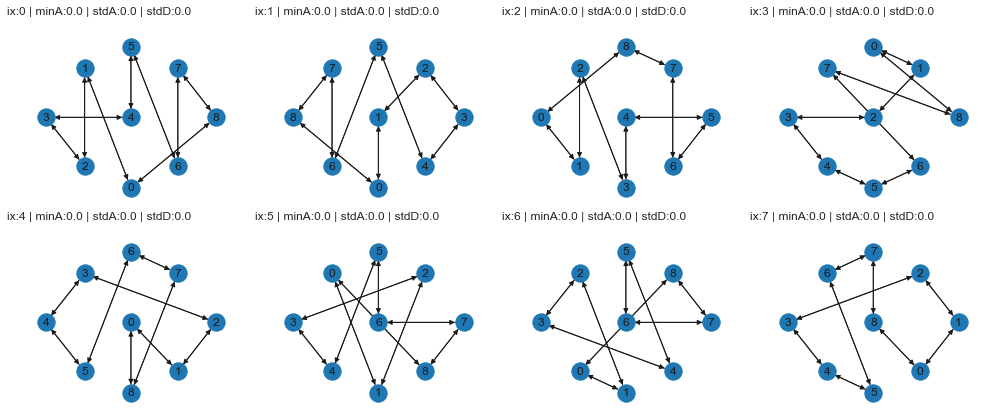

In [124]:
mpko.layout.plot_bunch_o_graphs([i for i in range(len(unique_check))],unique_check2,edges)

In [ ]:
[0,7] [1,6] [2,5] [3,4]

In [63]:
[unique_check[0].index(i) for i in range(9)]

[5, 1, 7, 3, 4, 8, 2, 6, 0]

In [69]:
mpko.layout.find_physical_edge_lengths([[0,5]],mpko.layout.poke_pos)

array([149.])

In [81]:
unique_check2[0]

[0, 6, 1, 3, 4, 8, 2, 7, 5]

In [97]:
def get_shortest_path(st,nd,length=9):
    angle_step = 2*np.pi/length
    print(st*angle_step)
    print(nd*angle_step)
    print((st-nd)*angle_step)
    print((nd-st)*angle_step)

    print(np.pi)

In [110]:
def get_modulo_distance(rloc,state,nStates=6):
    dists = np.abs([rloc-state,rloc-(state+nStates),rloc-(state-nStates)])
    min_dist = np.min(dists)
    min_dir = np.argmin(np.abs([rloc-state,rloc-(state+nStates),rloc-(state-nStates)]))
    return min_dist, min_dir, dists

In [111]:
get_modulo_distance(1,8,nStates=9)

(2, 2, array([ 7, 16,  2]))

In [160]:
graph_for_dist = [unique_check[3].index(i) for i in range(9)]
print(graph_for_dist)

[0, 7, 1, 3, 2, 8, 4, 6, 5]


In [161]:
nStates = 9

all_dist = []
for st in range(nStates): #starting state
    for nd in range(nStates):  #target state
        
        if st!=nd:
            #dists,direction = get_modulo_distance(rloc=nd,state=st)
            
            #get_forwards distance
            going = True
            fw_pd = 0
            fw_sd = 0
            cState = st
            while going:  
                state_poke = graph_for_dist.index(cState)
                #print(cState)
                next_state_poke = graph_for_dist.index((cState+1)%(nStates))
                fw_sd += 1
                fw_pd += np.abs(poke_pos[state_poke] - poke_pos[next_state_poke]).sum()
                if next_state_poke==nd:
                    going = False
                else:
                    cState = (cState+1)%(nStates)
                
            #get_forwards distance
            going = True
            bw_pd = 0
            bw_sd = 0
            cState = st
            while going:  
                state_poke = graph_for_dist.index(cState)
                next_state_poke = graph_for_dist.index((cState-1)%(nStates))
                bw_sd += 1
                bw_pd += np.abs(poke_pos[state_poke] - poke_pos[next_state_poke]).sum()
                if next_state_poke==nd:
                    going = False
                else:
                    cState = (cState-1)%(nStates)
            
            all_dist.append([fw_sd,bw_sd,fw_pd,bw_pd,st,nd])

In [162]:
res = []
for d_ in all_dist:
    r_ = (d_[0]>=d_[1])==(d_[2]>=d_[3])
    res.append(r_)
    if r_==False:
        print(d_)

[6, 3, 687, 733, 0, 7]
[5, 4, 586, 834, 0, 8]
[5, 4, 586, 834, 1, 7]
[4, 5, 723, 697, 4, 5]
[4, 5, 834, 586, 5, 0]
[3, 6, 733, 687, 6, 0]
[4, 5, 834, 586, 6, 2]
[4, 5, 710, 710, 7, 4]
[5, 4, 697, 723, 8, 6]


C:\Users\takam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


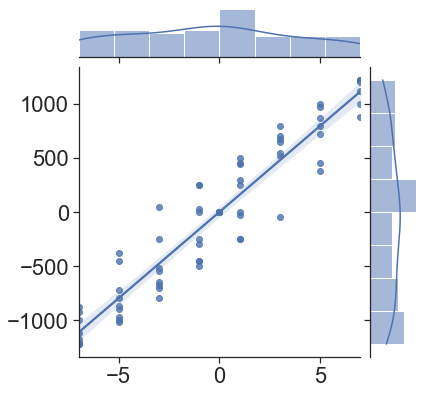

In [163]:
seaborn.jointplot([i[0]-i[1] for i in all_dist],[i[2]-i[3] for i in all_dist],kind='reg')

In [ ]:
for s in range(9):
    

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


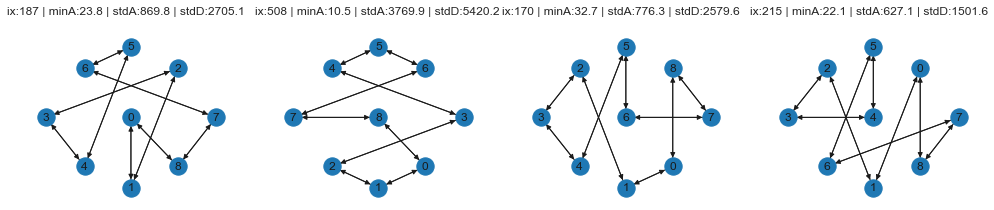

In [21]:
fin_graphs = [187,508,170,215]
uniq_set,all_uniq = mpko.layout.check_set_of_graphs_uniq(fin_graphs,layouts)
mpko.layout.plot_bunch_o_graphs(uniq_set,layouts,edges,mu_angle,var_angle,var_dist)

In [ ]:
[8,1,6,3,4,0,7,2,5]

In [ ]:
[['g1_1',],['g1_0'],['g3_1'],['g2_1','g4_1']

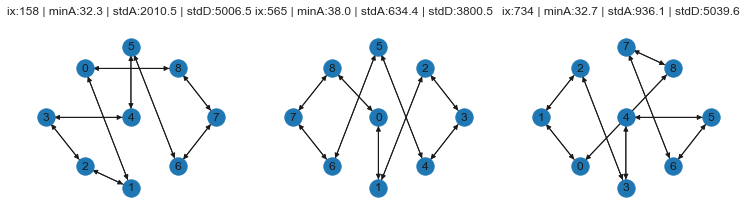

In [18]:
fin_graphs =[158,565,734,1037,740]
uniq_set,all_uniq = mpko.layout.check_set_of_graphs_uniq(fin_graphs,layouts)
mpko.layout.plot_bunch_o_graphs(uniq_set,layouts,edges,mu_angle,var_angle,var_dist)

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/yves/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


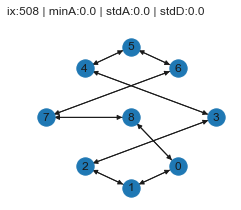

In [30]:
mpko.layout.plot_bunch_o_graphs([508],layouts,edges)

In [28]:
for uix in uniq_set:
    #print(layouts[i])
    print(uix,[mpko.layout.flip(layouts[uix],'V').index(i) for i in range(9)])


187 [5, 6, 2, 3, 0, 7, 4, 8, 1]
508 [5, 4, 6, 7, 8, 3, 2, 0, 1]
170 [5, 2, 8, 3, 6, 7, 4, 0, 1]
215 [5, 2, 0, 3, 4, 7, 6, 8, 1]


In [23]:
all_uniq

True

In [189]:
tmp[:,0]

array([187, 508, 170, 215, 187, 170])

In [183]:
tmp[0]

array([187, 215, 170, 508])

In [165]:
graph_orders[0][1]

[3, 7, 1, 5, 2, 8, 4, 6, 0]

In [130]:
tmp[0][0]

158

In [81]:
[mpko.layout.flip(layouts[158],'V').index(i) for i in range(9)]

[5, 1, 7, 3, 4, 8, 2, 6, 0]

In [77]:
[np.flipud(layouts[158]).tolist().index(i) for i in range(9)]

[8, 6, 2, 5, 4, 0, 7, 1, 3]

In [105]:

tmp = np.random.permutation(list(itertools.permutations((fin_graphs),4)))[:6]


In [168]:
tmp = np.array([[187,215,170,508],[508,187,215,170],
                [170,508,187,215],[215,170,508,187],
                [187,508,170,215],[170,215,187,508]])

In [179]:
tmp[:4,0]

array([187, 508, 170, 215])

In [172]:
for i in tmp:
    print(len(np.unique(i)))

4
4
4
4
4
4


In [173]:
len([np.unique(i) for i in tmp])

6

In [174]:
graph_orders = []
for i in tmp:
    tmp2 = []
    for j in i:
        tmp2.append([mpko.layout.flip(layouts[j],'V').index(i) for i in range(9)])
    graph_orders.append(tmp2)

In [185]:
graph_orders[1]

[[5, 4, 6, 7, 8, 3, 2, 0, 1],
 [5, 6, 2, 3, 0, 7, 4, 8, 1],
 [5, 2, 0, 3, 4, 7, 6, 8, 1],
 [5, 2, 8, 3, 6, 7, 4, 0, 1]]

In [92]:
[[0,0,1,1],
 [0,1,0,1],
 [0,1,1,0],
 [1,1,0,0],
 [1,1,0,1],
 [1,0,0,1]]

24

In [93]:
edge_list_line = [[0,1], [1,0], [1,2], [2,1], [2,3], 
                   [3,2], [3,4], [4,3], [4,5], [5,4],
                   [5,6], [6,5], [6,7], [7,6], [7,8],
                   [8,7]]

In [95]:
edge_list_line.extend([[0,8],[8,0]])

In [96]:
edge_list_line

[[0, 1],
 [1, 0],
 [1, 2],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [4, 5],
 [5, 4],
 [5, 6],
 [6, 5],
 [6, 7],
 [7, 6],
 [7, 8],
 [8, 7],
 [0, 8],
 [8, 0]]

In [31]:
from scipy.special import factorial

In [32]:
factorial(4)

24.0

# Legacy 

[array([6, 0, 1, 3, 4, 8, 2, 5, 7])]
[array([4, 0, 7, 5, 2, 8, 1, 3, 6])]
[array([1, 3, 6, 0, 4, 5, 2, 8, 7])]
[array([2, 5, 7, 0, 6, 3, 1, 8, 4])]
[array([1, 3, 6, 0, 4, 5, 7, 8, 2])]


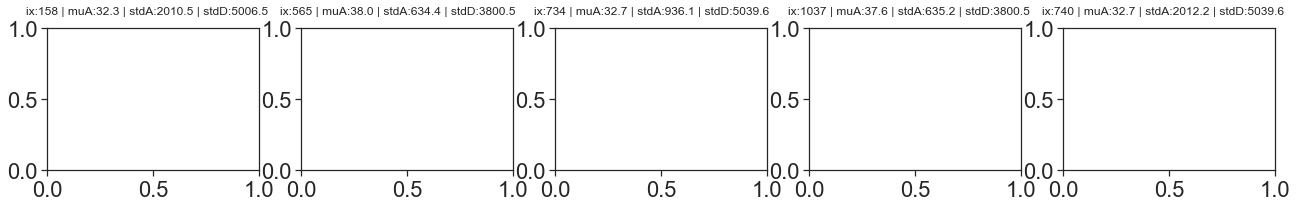

In [17]:
plt.figure(figsize=(22,12))
ijk = 1
for ix in [158,565,734,1037,740]:
    #ix = goodIxs[ix_]
    plt.subplot(4,5,ijk)
    printstr = 'ix:{:.0f} | muA:{:.1f} | stdA:{:.1f} | stdD:{:.1f}'.format(ix,mu_angle[ix],
                                                                           var_angle[ix],
                                                                           var_dist[ix])
    plt.gca().annotate(printstr,
                       [-.1,1.1],xycoords='axes fraction',fontsize=12)
    #nx.draw(G,
    #    pos=np.array(poke_pos)[np.array(layouts[ix])],#[np.random.permutation(range(9))],
    #    connectionstyle='arc3, rad=0.0',
    #    with_labels=True)

    print([np.array(layouts[ix])])
    ijk += 1


In [35]:
np.flipud([[5,7,2,8,1,3,6,4,0].index(i) for i in range(9)])

array([3, 1, 6, 0, 7, 5, 2, 4, 8])

In [84]:
poke_pos = [  [149,0],
         [68,19],[231,19],
       [0,62],[149,62],[298,62],
         [68,105],[231,105],
              [149,124]]